**Too similar**

In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imagecount = 38

In [3]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [4]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1886,00007413920,1,PillProjectDisc106/images/WIQH9J7NF3_TU7GH60DD...,C3PI_Reference,COREG,PillProjectDisc106,images,WIQH9J7NF3_TU7GH60DDFEBG2!PKYJ.CR2,.CR2
1887,00007413920,1,PillProjectDisc40/images/BN2XOVAIANGARH1KR-9YQ...,C3PI_Reference,COREG,PillProjectDisc40,images,BN2XOVAIANGARH1KR-9YQR3PUW6NEZV.CR2,.CR2
1888,00007413920,1,PillProjectDisc100/images/RO39YLHKMPPWASQW-GKP...,C3PI_Test,COREG,PillProjectDisc100,images,RO39YLHKMPPWASQW-GKP5P5RX4NTEM.JPG,.JPG
1889,00007413920,1,PillProjectDisc11/images/7JK9GFO2IWLU-ZJAT8RNK...,C3PI_Test,COREG,PillProjectDisc11,images,7JK9GFO2IWLU-ZJAT8RNKFI26!37IX.JPG,.JPG
1890,00007413920,1,PillProjectDisc11/images/7PNBHA3URM3K_O7UY_RCP...,C3PI_Test,COREG,PillProjectDisc11,images,7PNBHA3URM3K_O7UY_RCPNBT484J6B.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
129049,68382002401,1,PillProjectDisc65/images/CI7D2FLG-I!YWQAXHTB!7...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc65,images,CI7D2FLG-I!YWQAXHTB!7EN567ZUNIW.PNG,.PNG
129050,68382002401,1,PillProjectDisc66/images/CIR18FE22W6IP0_D9N_DT...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc66,images,CIR18FE22W6IP0_D9N_DTAKHTAOZ9Y.PNG,.PNG
129051,68382002401,1,PillProjectDisc91/images/IKSOY-VHPTJ60RI53I616...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc91,images,IKSOY-VHPTJ60RI53I6166SGKMMSP7.PNG,.PNG
129052,68382002401,1,PillProjectDisc91/images/IO7IDN4DVLAL25AI14O!2...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc91,images,IO7IDN4DVLAL25AI14O!2EY56Y4-Q2.PNG,.PNG


In [5]:
dfn.DRUG.value_counts()

ATENOLOL                           152
PREDNISONE                         152
CITALOPRAM                          76
FAMOTIDINE 20MG TAB                 38
LAMICTAL XR                         38
CARVEDILOL                          38
HYDROCODONE / ACETAMINOPHEN TAB     38
METOCLOPRAMIDE                      38
ISONIAZID TABLETS, USP              38
MIDODRINE TAB 10MG                  38
COREG                               38
VENLAFAXINE ER 225MG TAB            38
AVODART 0.5MG CAPSULES              38
FERROUS SULFATE 325MG               38
LISINOPRIL-HYDROCHLOROTHIAZIDE      38
AMIODARONE HYDROCHLORIDE            38
PROPRANOLOL HYDROCHLORIDE           38
Name: DRUG, dtype: int64

In [6]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(24,
 00781150601    38
 53489038401    38
 00173071204    38
 53489013901    38
 00591320201    38
 00185014901    38
 00378623201    38
 00143147501    38
 00555007101    38
 65580030403    38
 68382002201    38
 00378021801    38
 00555091709    38
 68382002401    38
 00173076100    38
 00378018301    38
 65862014401    38
 00677007010    38
 00007413920    38
 53489013801    38
 00378623101    38
 63304053701    38
 64679093603    38
 00591544201    38
 Name: NDC, dtype: int64)

In [7]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,AMIODARONE HYDROCHLORIDE,00555091709
1,ATENOLOL,00378021801
2,ATENOLOL,00781150601
3,ATENOLOL,68382002201
4,ATENOLOL,68382002401
5,AVODART 0.5MG CAPSULES,00173071204
6,CARVEDILOL,65862014401
7,CITALOPRAM,00378623101
8,CITALOPRAM,00378623201
9,COREG,00007413920


In [8]:
droplist = ['']

df = dfn[~dfn.NDC.isin(droplist)]

In [9]:
df.DRUG[df.NDC == '00093227434'] = 'AMOXICIL/CLAVULANATE 500/125MG'
df.DRUG[df.NDC == '68546014256'] = 'AZILECT 0.5MG'
df.DRUG[df.NDC == '00093423401'] = 'BUMETANIDE 2MG'
df.DRUG[df.NDC == '00093030801'] = 'CLEMASTINE FUMARATE 2.68 MG'
df.DRUG[df.NDC == '00555063402'] = 'DANAZOL 100MG'
df.DRUG[df.NDC == '00093312501'] = 'DICLOXACILLIN SOD 500MG'
df.DRUG[df.NDC == '00093511898'] = 'DILTIAZEM XR 240MG'
df.DRUG[df.NDC == '00093511798'] = 'DILTIAZEM ER 180MG'
df.DRUG[df.NDC == '68462012705'] = 'GABAPENTIN 800MG'
df.DRUG[df.NDC == '55111032001'] = 'GLIMEPIRIDE 1MG'
df.DRUG[df.NDC == '00781139101'] = 'HALOPERIDOL 0.5MG'
df.DRUG[df.NDC == '31722052010'] = 'HYDRALAZINE 25MG'
df.DRUG[df.NDC == '00093031401'] = 'KETOROLAC 10MG'
df.DRUG[df.NDC == '00093736498'] = 'LOSARTAN 25MG'
df.DRUG[df.NDC == '00555077902'] = 'MEDROXYPROGESTERONE'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1886,00007413920,1,PillProjectDisc106/images/WIQH9J7NF3_TU7GH60DD...,C3PI_Reference,COREG,PillProjectDisc106,images,WIQH9J7NF3_TU7GH60DDFEBG2!PKYJ.CR2,.CR2
1887,00007413920,1,PillProjectDisc40/images/BN2XOVAIANGARH1KR-9YQ...,C3PI_Reference,COREG,PillProjectDisc40,images,BN2XOVAIANGARH1KR-9YQR3PUW6NEZV.CR2,.CR2
1888,00007413920,1,PillProjectDisc100/images/RO39YLHKMPPWASQW-GKP...,C3PI_Test,COREG,PillProjectDisc100,images,RO39YLHKMPPWASQW-GKP5P5RX4NTEM.JPG,.JPG
1889,00007413920,1,PillProjectDisc11/images/7JK9GFO2IWLU-ZJAT8RNK...,C3PI_Test,COREG,PillProjectDisc11,images,7JK9GFO2IWLU-ZJAT8RNKFI26!37IX.JPG,.JPG
1890,00007413920,1,PillProjectDisc11/images/7PNBHA3URM3K_O7UY_RCP...,C3PI_Test,COREG,PillProjectDisc11,images,7PNBHA3URM3K_O7UY_RCPNBT484J6B.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
129049,68382002401,1,PillProjectDisc65/images/CI7D2FLG-I!YWQAXHTB!7...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc65,images,CI7D2FLG-I!YWQAXHTB!7EN567ZUNIW.PNG,.PNG
129050,68382002401,1,PillProjectDisc66/images/CIR18FE22W6IP0_D9N_DT...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc66,images,CIR18FE22W6IP0_D9N_DTAKHTAOZ9Y.PNG,.PNG
129051,68382002401,1,PillProjectDisc91/images/IKSOY-VHPTJ60RI53I616...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc91,images,IKSOY-VHPTJ60RI53I6166SGKMMSP7.PNG,.PNG
129052,68382002401,1,PillProjectDisc91/images/IO7IDN4DVLAL25AI14O!2...,MC_COOKED_CALIBRATED_V1.2,ATENOLOL,PillProjectDisc91,images,IO7IDN4DVLAL25AI14O!2EY56Y4-Q2.PNG,.PNG


In [11]:
df.DRUG.value_counts()

ATENOLOL                           152
PREDNISONE                         152
CITALOPRAM                          76
FAMOTIDINE 20MG TAB                 38
LAMICTAL XR                         38
CARVEDILOL                          38
HYDROCODONE / ACETAMINOPHEN TAB     38
METOCLOPRAMIDE                      38
ISONIAZID TABLETS, USP              38
MIDODRINE TAB 10MG                  38
COREG                               38
VENLAFAXINE ER 225MG TAB            38
AVODART 0.5MG CAPSULES              38
FERROUS SULFATE 325MG               38
LISINOPRIL-HYDROCHLOROTHIAZIDE      38
AMIODARONE HYDROCHLORIDE            38
PROPRANOLOL HYDROCHLORIDE           38
Name: DRUG, dtype: int64

In [12]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,AMIODARONE HYDROCHLORIDE,00555091709
1,ATENOLOL,00378021801
2,ATENOLOL,00781150601
3,ATENOLOL,68382002201
4,ATENOLOL,68382002401
5,AVODART 0.5MG CAPSULES,00173071204
6,CARVEDILOL,65862014401
7,CITALOPRAM,00378623101
8,CITALOPRAM,00378623201
9,COREG,00007413920


## Sample Batch

In [13]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00007413920,1,PillProjectDisc100/images/RO39YLHKMPPWASQW-GKP...,C3PI_Reference,COREG,PillProjectDisc100,images,0B6QUB-E_CU9RP0JEPY_1NHP28ZMRU.JPG,.CR2
1,00143147501,1,PillProjectDisc102/images/SVXE9SN_OJGH3E0TW9EG...,C3PI_Reference,PREDNISONE,PillProjectDisc102,images,-SLUM3!M1KY1RIQ_R1E1RQ767A!8MW.JPG,.CR2
2,00173071204,1,PillProjectDisc103/images/U1INGAY!NO_4OWRFWINW...,C3PI_Reference,AVODART 0.5MG CAPSULES,PillProjectDisc103,images,0D62DKTU6P6IDXY!LRNMR2KX41KX18.CR2,.CR2
3,00173076100,1,PillProjectDisc1/images/!!SQC-AZJRVBJPE93GW_Z-...,C3PI_Reference,LAMICTAL XR,PillProjectDisc1,images,!!SQC-AZJRVBJPE93GW_Z-NUMHKU-I.JPG,.CR2
4,00185014901,1,PillProjectDisc10/images/7DGHGOIFL8LICGFX1M24Y...,C3PI_Reference,MIDODRINE TAB 10MG,PillProjectDisc10,images,28WOZ7DAEMRQPVIKPITXXB1K_JEOL0.PNG,.CR2
5,00378018301,1,PillProjectDisc101/images/S1CN4ILKFASKY0-S018R...,C3PI_Reference,PROPRANOLOL HYDROCHLORIDE,PillProjectDisc101,images,0FDAKVRGZ951VHQMK11T48ZZEC1JU_.JPG,.CR2
6,00378021801,1,PillProjectDisc1/images/!5Z56BSBLRWE5MTG0BR4TQ...,C3PI_Reference,ATENOLOL,PillProjectDisc1,images,!5Z56BSBLRWE5MTG0BR4TQJ81O0V!H.JPG,.CR2
7,00378623101,1,PillProjectDisc10/images/7E5!M72ZH_L-C_J38ZADM...,C3PI_Reference,CITALOPRAM,PillProjectDisc10,images,2RGH49KRXGLSM2KSKBGXC!Y9F3!0O9.JPG,.CR2
8,00378623201,1,PillProjectDisc10/images/6S8VOOU-RXLQUIYUS3V7M...,C3PI_Reference,CITALOPRAM,PillProjectDisc10,images,0R-JC!UBUGN2RNQ8PSRZZ0QYWRW4GZ.PNG,.CR2
9,00555007101,1,PillProjectDisc10/images/736UIV3GHNSENNOY7IPXW...,C3PI_Reference,"ISONIAZID TABLETS, USP",PillProjectDisc10,images,0FD10GZNXGPY9CNSWR!B7_6RWIIPKX.CR2,.CR2


In [14]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!!SQC-AZJRVBJPE93GW_Z-NUMHKU-I.JPG',
 'PillProjectDisc1/images/!3S6WQIACCZHVNWQFZQQP16WDH8QR2.JPG',
 'PillProjectDisc1/images/!5Z56BSBLRWE5MTG0BR4TQJ81O0V!H.JPG',
 'PillProjectDisc1/images/!9E_4SVBJYWXVWSG00KFN84L4!-XX_.PNG',
 'PillProjectDisc1/images/!KYMG57HUPLP6UNFSUY93QV721MP-Q.JPG',
 'PillProjectDisc1/images/!O4DFWXWCEW0H5PQ2DXLF7QNYRF9SD.JPG',
 'PillProjectDisc1/images/!ZS5XF3OMVY-MX6SUR7XSGG16K4HX7.JPG',
 'PillProjectDisc10/images/6S8VOOU-RXLQUIYUS3V7M9C4BL_MA!.JPG',
 'PillProjectDisc10/images/7-Y1_TRZ4TKH1G0EXSYAVLHOH3-ENO.PNG',
 'PillProjectDisc10/images/736UIV3GHNSENNOY7IPXW5ZCAU5O_4.PNG',
 'PillProjectDisc10/images/7DGHGOIFL8LICGFX1M24Y9CDPX-_2T.JPG',
 'PillProjectDisc10/images/7E5!M72ZH_L-C_J38ZADM1N_BUXIY4.JPG',
 'PillProjectDisc100/images/RAQ79EWUW4BLDN1N_KDK1!FI3DJW26.JPG',
 'PillProjectDisc100/images/RO39YLHKMPPWASQW-GKP5P5RX4NTEM.JPG',
 'PillProjectDisc100/images/RPAP_T-K!E_HCJDIKLUXJ_Q3U0UT5H.JPG',
 'PillProjectDisc101/images/S1CN4ILKFASKY0-S

In [15]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

7

In [16]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

! cd ..

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data
img38 img38/img38
/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img38


In [17]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img38'

In [18]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue
    

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img38/img38


/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


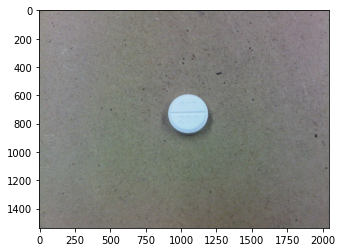

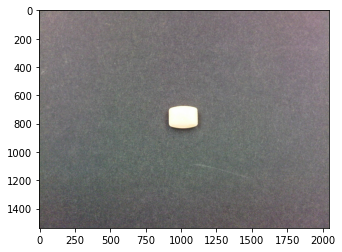

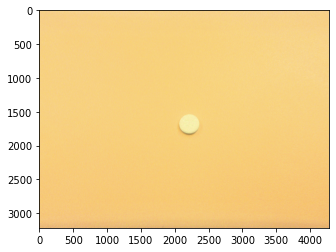

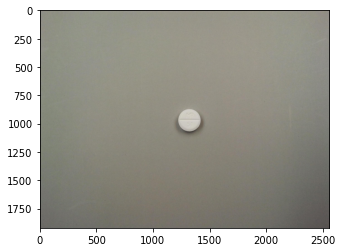

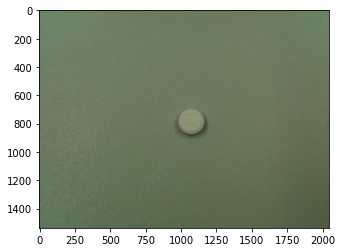

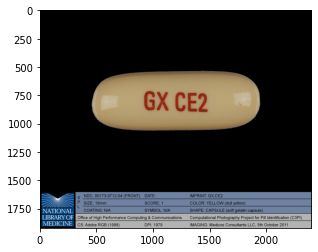

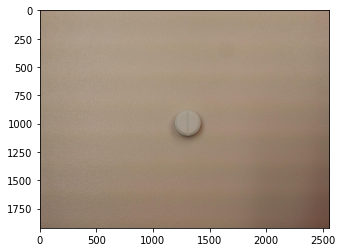

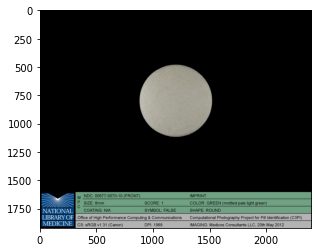

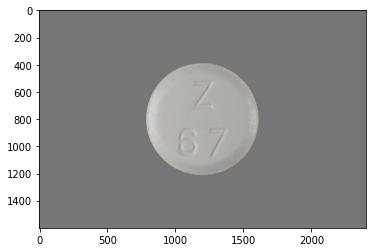

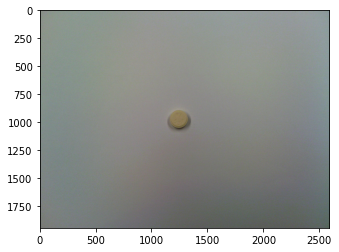

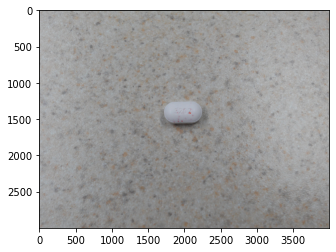

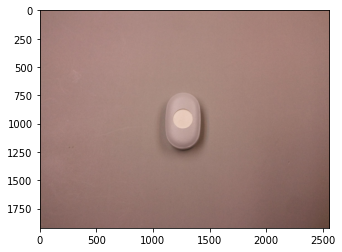

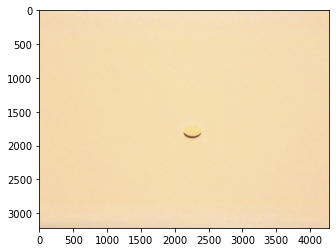

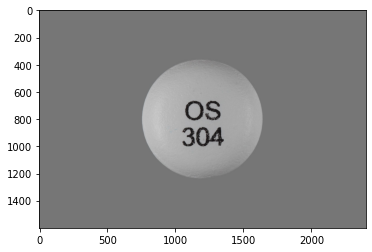

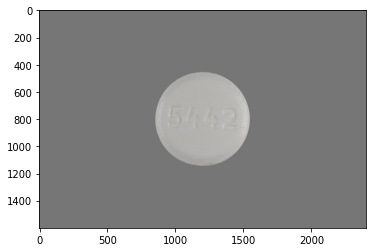

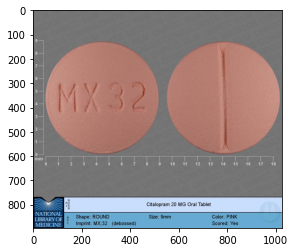

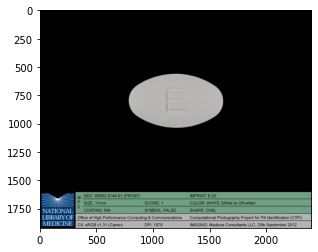

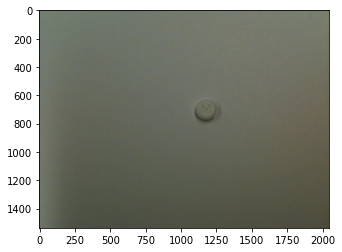

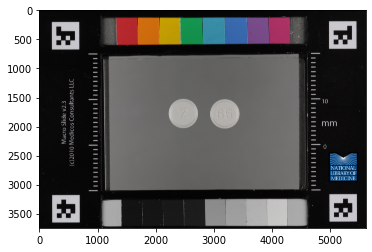

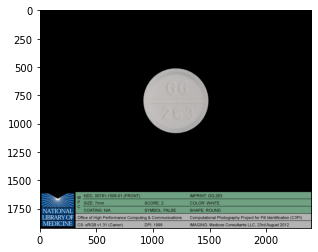

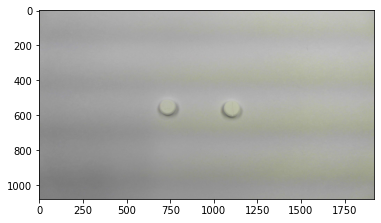

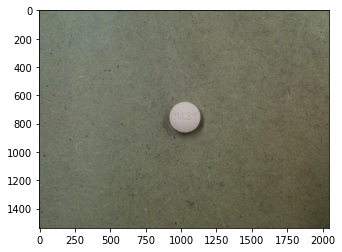

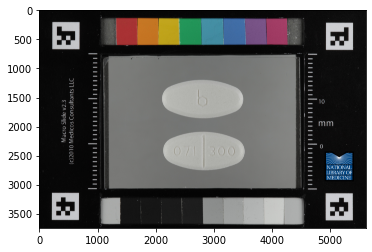

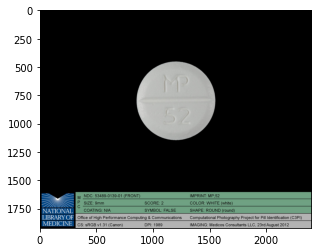

In [19]:
%cd $folder

images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)

In [22]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/QV3PUW3N2HL6KF8HSXV_1KL7HH98!E.JPG',
 'PillProjectDisc100/images/QY_4JH6D4YSSXZZHN2L!7LGE08P4QZ.PNG']

In [23]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [ ]:
%cd /content/drive/My Drive/Project: Pill ID/Data
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir('/content/drive/My Drive/Project: Pill ID/Data')
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')